In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

In [2]:
raw_data = pd.read_csv(r"/content/credit_risk_dataset.csv")

In [3]:
raw_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
raw_data["loan_status"].value_counts()

,count
loan_status,
0,25473
1,7108


In [6]:
round((len(raw_data[raw_data["loan_status"] == 1]) / len(raw_data) * 100), 2)

21.82

atleast the ratio should be 60:40, need to balance the data

In [7]:
raw_data.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


**Will be working on the variables perseon_emp_length and loan_int_rate**

**Target and inputs**

In [8]:
inputs_df = raw_data.drop(["loan_status"], axis=1)
target = raw_data["loan_status"]

In [9]:
categorical_columns = inputs_df.select_dtypes(include=["object"]).columns
numerical_columns = inputs_df.select_dtypes(exclude=["object"]).columns

In [10]:
categorical_columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [11]:
def value_counts(df, column):
  return df[column].value_counts() / len(inputs_df)

In [12]:
value_counts(inputs_df, "person_home_ownership")

# The people who are apying the money over the period of time to buy the home eventually at specific period they will buy it
# So, with the above mindset I will be combining the MORTGAGE and OWN classes and will drop OTHER class as they have 0.3 % of the dataset
# will check if it can't help to perform model well then I will consider not to drop it

,count
person_home_ownership,
RENT,0.504773
MORTGAGE,0.412633
OWN,0.079310
OTHER,0.003284


In [13]:
inputs_df = inputs_df[inputs_df["person_home_ownership"] != "OTHER"]

In [14]:
map_ownership = {"RENT" : 0, "MORTGAGE" : 1, "OWN" : 1}

inputs_df["person_home_ownership"] = inputs_df["person_home_ownership"].map(map_ownership)

In [15]:
inputs_df["person_home_ownership"].unique()

array([0, 1])

In [16]:
value_counts(inputs_df, "loan_intent")

## almost all the classes are having nearly same ratio with small deviation

,count
loan_intent,
EDUCATION,0.198189
MEDICAL,0.186426
VENTURE,0.175309
PERSONAL,0.169459
DEBTCONSOLIDATION,0.159974
HOMEIMPROVEMENT,0.110642


In [17]:
map_loan_intent = {"EDUCATION" : 0,
                   "MEDICAL" : 1,
                   "VENTURE" : 2,
                   "PERSONAL" : 3,
                   "DEBTCONSOLIDATION" : 4,
                   "HOMEIMPROVEMENT" : 5}

inputs_df["loan_intent"] = inputs_df["loan_intent"].map(map_loan_intent)

In [18]:
value_counts(inputs_df, "loan_grade")

# as we can see here that A, B, C has the greater ratio and from D-G it has minimum ratio and coincidently they all represent to the default status
# we can combine D-G in one class say ----> D

,count
loan_grade,
A,0.331065
B,0.320780
C,0.198343
D,0.111043
E,0.029439
F,0.007360
G,0.001971


In [19]:
inputs_df["loan_grade"] = inputs_df["loan_grade"].replace(["D", "E", "F", "G"], "D")
inputs_df["loan_grade"].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [20]:
map_loan_grade = {"A" : 0,
                  "B" : 1,
                  "C" : 2,
                  "D" : 3}

inputs_df["loan_grade"] = inputs_df["loan_grade"].map(map_loan_grade)

In [21]:
value_counts(inputs_df, categorical_columns[3])

# we will check after calculating the corr w.r.t the target variable
# will handle after converting the categorcial column to the numeric

,count
cb_person_default_on_file,
N,0.823982
Y,0.176018


In [22]:
map_default = {"Y" : 0, "N" : 1}

inputs_df["cb_person_default_on_file"] = inputs_df["cb_person_default_on_file"].map(map_default)

In [23]:
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32474 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32474 non-null  int64  
 1   person_income               32474 non-null  int64  
 2   person_home_ownership       32474 non-null  int64  
 3   person_emp_length           31579 non-null  float64
 4   loan_intent                 32474 non-null  int64  
 5   loan_grade                  32474 non-null  int64  
 6   loan_amnt                   32474 non-null  int64  
 7   loan_int_rate               29371 non-null  float64
 8   loan_percent_income         32474 non-null  float64
 9   cb_person_default_on_file   32474 non-null  int64  
 10  cb_person_cred_hist_length  32474 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.0 MB


In [24]:
inputs_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,3,3,35000,16.02,0.59,0,3
1,21,9600,1,5.0,0,1,1000,11.14,0.10,1,2
2,25,9600,1,1.0,1,2,5500,12.87,0.57,1,3
3,23,65500,0,4.0,1,2,35000,15.23,0.53,1,2
4,24,54400,0,8.0,1,2,35000,14.27,0.55,0,4


In [25]:
target_df = target.loc[inputs_df.index]

# dropping the same rows which I have dropped from inputs dataframe

In [26]:
len(target_df)

32474

**Will start working with numerical variables**

In [27]:
numerical_columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [28]:
inputs_df[numerical_columns].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,32474.000000,3.247400e+04,31579.000000,32474.000000,29371.000000,32474.000000,32474.000000
mean,27.737667,6.604087e+04,4.793439,9584.477582,11.008434,0.170132,5.805783
std,6.347889,6.190441e+04,4.143079,6322.591790,3.241766,0.106756,4.055644
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12118.750000,13.470000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


We can see here that there are outliers and have to deal with it

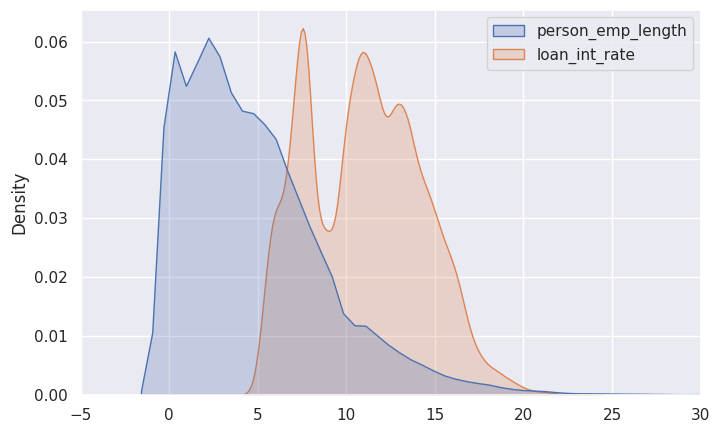

In [29]:
plt.figure(figsize = (8, 5))
sns.kdeplot(raw_data[["person_emp_length", "loan_int_rate"]], fill=True)
plt.xlim(-5, 30)
plt.show()

<ipython-input-30-8e5a6ba4b452>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=inputs_df[feature], fill=True, ax=axes[i], palette="viridis", common_norm=False)
<ipython-input-30-8e5a6ba4b452>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=inputs_df[feature], fill=True, ax=axes[i], palette="viridis", common_norm=False)
<ipython-input-30-8e5a6ba4b452>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=inputs_df[feature], fill=True, ax=axes[i], palette="viridis", common_norm=False)
<ipython-input-30-8e5a6ba4b452>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=inputs_df[feature], fill=True, ax=axes[i], palette="viridis", common_norm=False)
<ipython-input-30-8e5a6ba4b452>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=inputs_df[featur

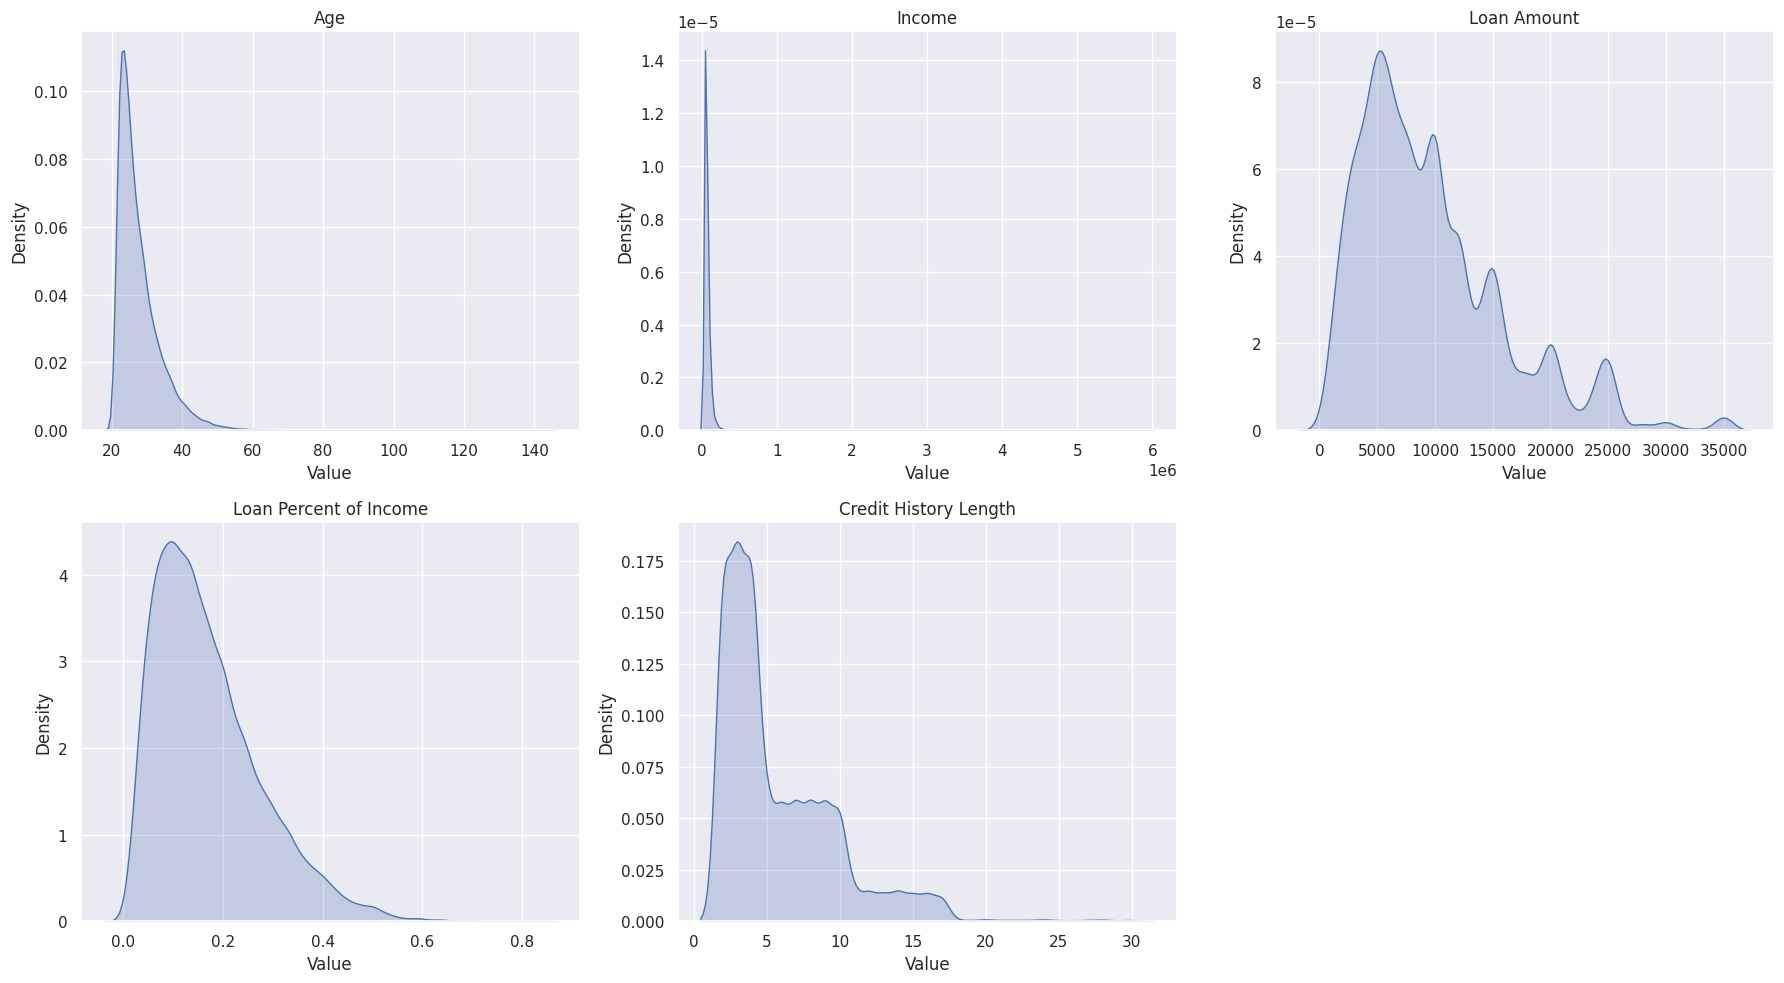

In [30]:
# Define the features you want to plot
features = ['person_age', 'person_income', 'loan_amnt', 'loan_percent_income', 'cb_person_cred_hist_length']
titles = ['Age', 'Income', 'Loan Amount', 'Loan Percent of Income', 'Credit History Length']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    sns.kdeplot(data=inputs_df[feature], fill=True, ax=axes[i], palette="viridis", common_norm=False)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

# Remove any unused subplots (if fewer than 6 features)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

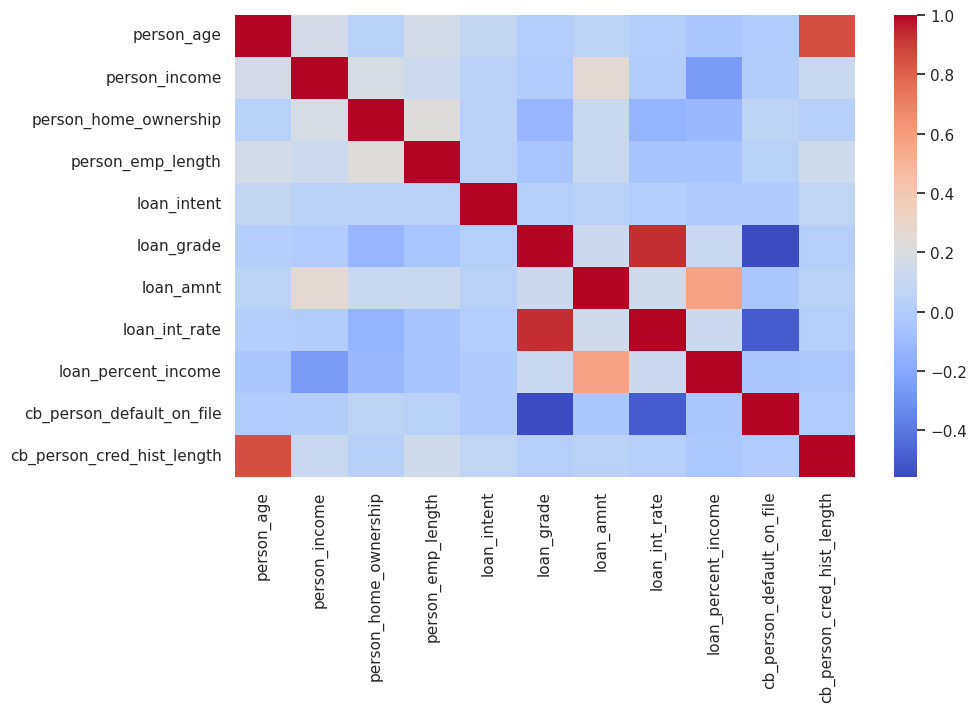

In [31]:
plt.figure(figsize = (10, 6))
corr_matrix = inputs_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

loan_amount and loan_int_rate are highly correlated around 0.6             
loan_int_rate is highly correlated with loan_grade          
cb_person_cred_hit_length and person_age are also highly correlated with eachother

Here I can see that loan_int_rate is highly correlated with loan_grade will substitue the missing values w.r.t loan_grad          
person_emp_length is slightly aligned with person_home_ownership

In [32]:
correlations = inputs_df.apply(lambda col: col.corr(target_df))

correlations

,0
person_age,-0.021541
person_income,-0.144214
person_home_ownership,-0.240072
person_emp_length,-0.082234
loan_intent,0.061269
loan_grade,0.357933
loan_amnt,0.104693
loan_int_rate,0.334974
loan_percent_income,0.378256
cb_person_default_on_file,-0.178383


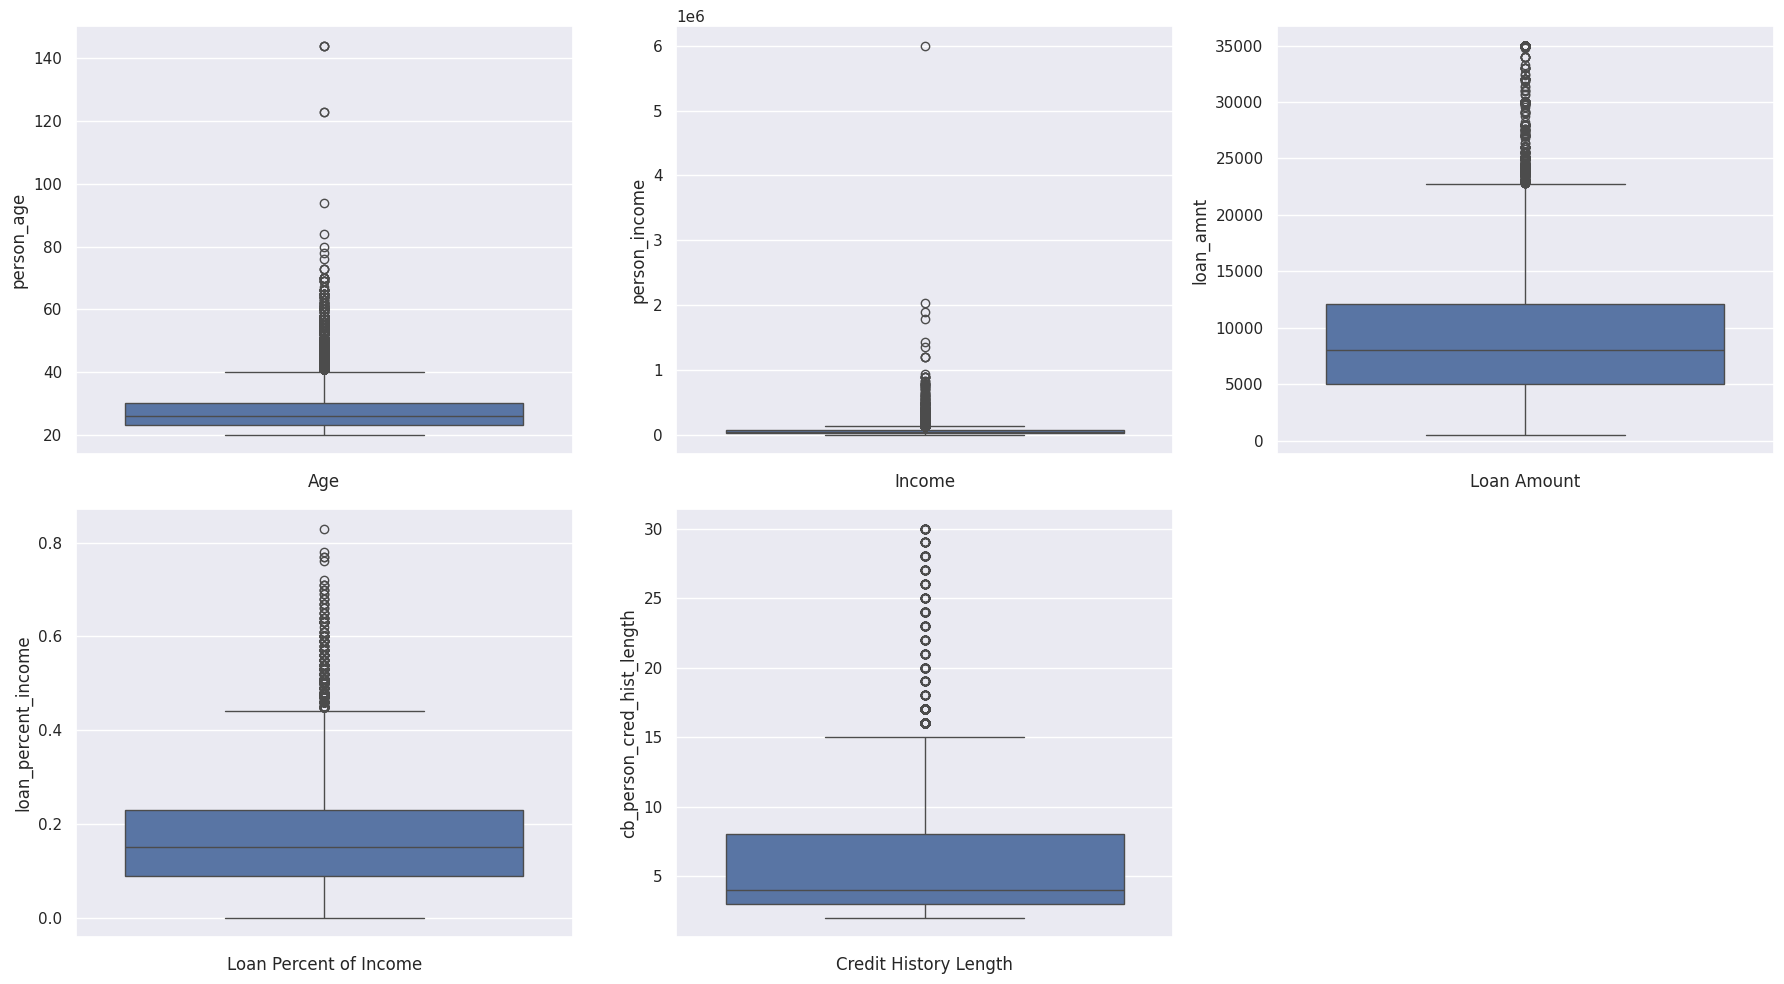

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for ax, label, feature in zip(axes, titles, features):
  sns.boxplot(inputs_df[feature], ax=ax)
  ax.set_xlabel(label)
  plt.grid()

# Removing any unused subplots (if fewer than 6 features)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [34]:
# 'person_age', 'person_income', 'loan_amnt', 'loan_percent_income', 'cb_person_cred_hist_length'

len(inputs_df[inputs_df['person_age'] > 65])
## need to remove these rows

35

In [35]:
len(inputs_df[inputs_df['person_income'] > 1000000])
## need to remove these rows

9

In [36]:
len(inputs_df[inputs_df['loan_amnt'] > 30000]) / len(raw_data)
## we can remove these rows

0.006752401706516068

In [37]:
len(inputs_df[inputs_df['loan_percent_income'] > 0.6])
## can remove these rows

51

In [38]:
## removing extreme outliers
inputs_df = inputs_df[inputs_df['person_age'] < 65]
inputs_df = inputs_df[inputs_df['person_income'] < 1000000]
inputs_df = inputs_df[inputs_df['loan_amnt'] < 30000]
inputs_df = inputs_df[inputs_df['loan_percent_income'] < 0.6]
inputs_df = inputs_df[inputs_df["person_age"] < 80]
inputs_df = inputs_df[inputs_df["person_emp_length"] < 36]

In [39]:
# define a function to remove outliers (in the case we want to remove all the outliers)
def remove_outliers(df, columns):

    for col in columns:

      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)

      IQR = Q3 - Q1

      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

    return df

In [40]:
inputs_df = remove_outliers(inputs_df, ['cb_person_cred_hist_length', "loan_int_rate"])

In [41]:
data = inputs_df.copy()

In [42]:
data["loan_status"] = target_df

In [43]:
bins = [5, 8, 11, 14, 17, 20, 23, 25]
data['loan_int_rate_bin'] = pd.cut(data['loan_int_rate'], bins=bins, labels=False)

# Group by loan_grade, loan_int_rate_bin, and target variable to get counts
combination_counts = data.groupby(['loan_grade', 'loan_int_rate_bin', 'loan_status']).size().reset_index(name='count')

# Function to fill missing loan_int_rate based on the most common combination
def fill_missing_loan_int_rate(row):
    if pd.isnull(row['loan_int_rate']):
        # Filtering based on loan_grade and loan_status
        matched_combination = combination_counts[
            (combination_counts['loan_grade'] == row['loan_grade']) &
            (combination_counts['loan_status'] == row['loan_status'])
        ]

        # Get the most frequent loan_int_rate_bin for this combination
        if not matched_combination.empty:
            most_frequent_bin = matched_combination.sort_values(by='count', ascending=False).iloc[0]['loan_int_rate_bin']

            # Ensuring most_frequent_bin is an integer for indexing
            most_frequent_bin = int(most_frequent_bin)

            # Return the midpoint of the bin as a substitute
            bin_edges = pd.IntervalIndex.from_breaks(bins)
            return bin_edges[most_frequent_bin].mid  # Midpoint of the bin as the substitute value
    return row['loan_int_rate']

# Applying the function to fill missing values
data['loan_int_rate'] = data.apply(fill_missing_loan_int_rate, axis=1)

# Drop the temporary columns if not needed
data = data.drop(columns=['loan_int_rate_bin'])

In [44]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
1,21,9600,1,5.0,0,1,1000,11.14,0.10,1,2,0
2,25,9600,1,1.0,1,2,5500,12.87,0.57,1,3,1
5,21,9900,1,2.0,2,0,2500,7.14,0.25,1,2,1
9,21,10000,1,6.0,2,3,1600,14.74,0.16,1,3,1
11,21,10000,1,2.0,5,0,4500,8.63,0.45,1,2,1


In [45]:
data.shape

(27234, 12)

In [46]:
data.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


**Multicollinearity**

In [47]:
from sklearn.feature_selection import f_regression

In [48]:
p_value = f_regression(data.drop("loan_status", axis=1), data["loan_status"])[1]

In [49]:
p_value

array([3.25764207e-007, 1.15386775e-221, 0.00000000e+000, 1.25984293e-049,
       2.18103241e-024, 0.00000000e+000, 9.99106423e-065, 0.00000000e+000,
       0.00000000e+000, 1.16767210e-201, 1.01074886e-004])

In [50]:
round(9.99106423e-065)

0

As from p-values we can see that every variable is significant, so we can't rely on it for feature selection

**Splitting the dataset into training and testing data**

In [51]:
train_data, test_data, train_labels, test_labels = train_test_split(data.drop("loan_status", axis=1), data["loan_status"], test_size=0.2, random_state=369)

In [52]:
train_data.shape

(21787, 11)

In [53]:
test_data.shape

(5447, 11)

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## models to apply
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, BaggingClassifier

In [55]:
down_sample = RandomUnderSampler()

In [56]:
resample_train_data, resample_train_labels = down_sample.fit_resample(train_data, train_labels)

In [57]:
resample_train_data.shape

(9280, 11)

<ipython-input-58-a3ff99c0dde2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=resample_train_labels, palette='coolwarm')


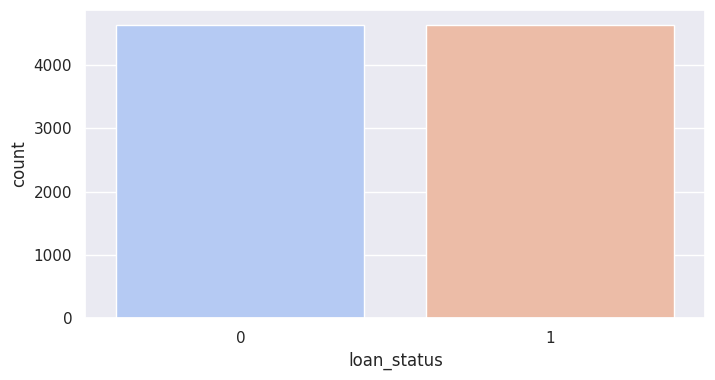

In [58]:
plt.figure(figsize=(8, 4))
sns.countplot(x=resample_train_labels, palette='coolwarm')
plt.show()

Now we have the balanced dataset now we can work on it

**Scaling the data**

In [59]:
scaler = StandardScaler()
min_max = MinMaxScaler()

In [60]:
## Random Forest Model
rf_model = RandomForestClassifier(n_estimators=150, n_jobs=-1, oob_score=True)
## Gradient Boosting Model
gb_model = GradientBoostingClassifier()
## logistic Regression Model
log_model = LogisticRegression()

In [61]:
# after applying the standard scaler the data will be converted to numpy
scaled_data = scaler.fit_transform(resample_train_data)

In [62]:
# converting train labels to numpy array
train_lables = resample_train_labels.values

In [63]:
# function to scale the provided data especially for test data
def test_scaling(test_data):
  scaled_test_data = scaler.transform(test_data)
  return scaled_test_data

In [64]:
test_scaled_data = test_scaling(test_data)
test_labels = test_labels.values

**Model Building**

In [65]:
rf_model_demo = rf_model.fit(scaled_data, train_lables)

In [66]:
rf_model_demo.oob_score_

0.8493534482758621

In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

confusion_matrix(train_lables, rf_model_demo.predict(scaled_data))

array([[4640,    0],
       [   0, 4640]])

In [68]:
report = classification_report(train_lables, rf_model_demo.predict(scaled_data))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4640
           1       1.00      1.00      1.00      4640

    accuracy                           1.00      9280
   macro avg       1.00      1.00      1.00      9280
weighted avg       1.00      1.00      1.00      9280



In [70]:
accuracy_score(test_labels, rf_model_demo.predict(test_scaled_data))

0.8804846704608041

In [72]:
test_report = classification_report(test_labels, rf_model_demo.predict(test_scaled_data))
print(test_report)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4261
           1       0.70      0.80      0.74      1186

    accuracy                           0.88      5447
   macro avg       0.82      0.85      0.83      5447
weighted avg       0.89      0.88      0.88      5447



From above I can see that the Random Forest model is overfitting, need to tune it and will make the modek to generalize well

In [73]:
gb_model_demo = gb_model.fit(scaled_data, train_lables)

In [75]:
gb_report_demo = classification_report(train_lables, gb_model_demo.predict(scaled_data))
print(gb_report_demo)
## it is

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4640
           1       0.90      0.79      0.84      4640

    accuracy                           0.85      9280
   macro avg       0.86      0.85      0.85      9280
weighted avg       0.86      0.85      0.85      9280



In [76]:
gb_report_test = classification_report(test_labels, gb_model_demo.predict(test_scaled_data))
print(gb_report_test)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4261
           1       0.69      0.78      0.73      1186

    accuracy                           0.87      5447
   macro avg       0.81      0.84      0.82      5447
weighted avg       0.88      0.87      0.88      5447



from above Gradient Boosting Model is somewhat has less accuracy than Random Forest but it well at generalizing

**Hyper Paramter Tuning**

In [77]:
n_estimators = np.arange(100, 150, 10)
max_depth = np.arange(3, 6, 1)
max_features = np.arange(2, 7)
max_samples = [0.4, 0.5, 0.75]

In [79]:
## Random Forest Model
rf_params = {"n_estimators" : n_estimators,
             "max_depth" : max_depth,
             "max_features" : max_features,
             "max_samples" : max_samples}

In [81]:
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid=rf_params,
                       cv=10,
                       n_jobs=-1)

In [82]:
rf_grid

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=150, n_jobs=-1,
                                              oob_score=True),
             n_jobs=-1,
             param_grid={'max_depth': array([3, 4, 5]),
                         'max_features': array([2, 3, 4, 5, 6]),
                         'max_samples': [0.4, 0.5, 0.75],
                         'n_estimators': array([100, 110, 120, 130, 140])})

In [83]:
rf_grid.fit(scaled_data, resample_train_labels)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=150, n_jobs=-1,
                                              oob_score=True),
             n_jobs=-1,
             param_grid={'max_depth': array([3, 4, 5]),
                         'max_features': array([2, 3, 4, 5, 6]),
                         'max_samples': [0.4, 0.5, 0.75],
                         'n_estimators': array([100, 110, 120, 130, 140])})

In [84]:
rf_grid.best_params_

{'max_depth': 5, 'max_features': 6, 'max_samples': 0.75, 'n_estimators': 120}

In [85]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=5, max_features=6, max_samples=0.75,
                       n_estimators=120, n_jobs=-1, oob_score=True)

In [86]:
rf_grid.best_score_

0.8339439655172413

In [87]:
n_estimators = np.arange(100, 150, 10)
max_depth = np.arange(3, 8, 1)
max_features = np.arange(2, 7)
ccp_alpha = [0.01, 0.03, 0.02]

In [88]:
gb_params = {"n_estimators" : n_estimators,
          "max_depth" : max_depth,
          "max_features" : max_features,
          "ccp_alpha":  ccp_alpha}

In [89]:
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid=gb_params,
                       cv=10,
                       n_jobs=-1)

In [90]:
gb_grid.fit(scaled_data, resample_train_labels)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.03, 0.02],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4, 5, 6]),
                         'n_estimators': array([100, 110, 120, 130, 140])})

In [91]:
gb_grid.best_params_

{'ccp_alpha': 0.01, 'max_depth': 5, 'max_features': 5, 'n_estimators': 110}

In [92]:
gb_grid.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.01, max_depth=5, max_features=5,
                           n_estimators=110)

In [93]:
gb_grid.best_score_

0.8104525862068966

**Evaluations**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [94]:
final_gb_model = gb_grid.best_estimator_

In [95]:
pred_labels = final_gb_model.predict(test_scaled_data)

In [96]:
accuracy_score(test_labels, pred_labels)

0.8523958142096567

In [97]:
confusion_matrix(test_labels, pred_labels)

array([[3783,  478],
       [ 326,  860]])

In [98]:
report = classification_report(test_labels, pred_labels)

In [100]:
print(report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      4261
           1       0.64      0.73      0.68      1186

    accuracy                           0.85      5447
   macro avg       0.78      0.81      0.79      5447
weighted avg       0.86      0.85      0.86      5447



In [101]:
final_rf_model = rf_grid.best_estimator_

In [102]:
rf_pred_labels = final_rf_model.predict(test_scaled_data)

In [103]:
rf_report = classification_report(test_labels, rf_pred_labels)

print(rf_report)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4261
           1       0.73      0.75      0.74      1186

    accuracy                           0.88      5447
   macro avg       0.83      0.84      0.83      5447
weighted avg       0.89      0.88      0.88      5447

